**Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load and Preview the Data**

In [3]:
file_path = "/content/Product-Sales-Region.xlsx"
df = pd.read_excel(file_path)

**Data Overview & Error Checks**

In [5]:
df.head()

,Date,Region,Product,Quantity,UnitPrice,StoreLocation,CustomerType,Discount,Salesperson,TotalPrice,PaymentMethod,Promotion,Returned,OrderID,CustomerName,ShippingCost,OrderDate,DeliveryDate,RegionManager
0,2023-02-23,East,Laptop,14,163.60,Store B,Wholesale,0.00,Eva,2290.400,Online,FREESHIP,0,REG100000,Cust 6583,43.34,2023-02-23,2023-02-27,Eric
1,2024-12-19,South,Phone,1,544.01,Store A,Retail,0.00,Alice,544.010,Gift Card,SAVE10,0,REG100001,Cust 2144,5.30,2024-12-19,2024-12-28,Sophie
2,2023-05-10,North,Desk,14,346.18,Store B,Wholesale,0.10,Alice,4361.868,Online,WINTER15,0,REG100002,Cust 5998,20.46,2023-05-10,2023-05-19,Ryan
3,2025-02-26,Central,Chair,18,384.82,Store A,Wholesale,0.15,Frank,5887.746,Gift Card,FREESHIP,0,REG100003,Cust 7136,27.95,2025-02-26,2025-03-02,Cameron
4,2023-06-24,East,Desk,18,237.76,Store C,Retail,0.00,Carlos,4279.680,Online,SAVE10,0,REG100004,Cust 6506,5.73,2023-06-24,2023-06-27,Eric


In [8]:
df.shape

(1500, 19)

In [9]:
df.columns.tolist()

['Date',
 'Region',
 'Product',
 'Quantity',
 'UnitPrice',
 'StoreLocation',
 'CustomerType',
 'Discount',
 'Salesperson',
 'TotalPrice',
 'PaymentMethod',
 'Promotion',
 'Returned',
 'OrderID',
 'CustomerName',
 'ShippingCost',
 'OrderDate',
 'DeliveryDate',
 'RegionManager']

In [10]:
df.dtypes

,0
Date,datetime64[ns]
Region,object
Product,object
Quantity,int64
UnitPrice,float64
StoreLocation,object
CustomerType,object
Discount,float64
Salesperson,object
TotalPrice,float64


In [12]:
df.isnull().sum()

,0
Date,0
Region,0
Product,0
Quantity,0
UnitPrice,0
StoreLocation,0
CustomerType,0
Discount,0
Salesperson,0
TotalPrice,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,Date,Quantity,UnitPrice,Discount,TotalPrice,Returned,ShippingCost,OrderDate,DeliveryDate
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500,1500
mean,2024-04-07 21:35:02.400000256,10.410667,298.826947,0.073133,2919.994952,0.248000,27.507293,2024-04-07 21:35:02.400000256,2024-04-13 22:36:28.799999744
min,2023-01-01 00:00:00,1.000000,5.520000,0.000000,6.970000,0.000000,5.010000,2023-01-01 00:00:00,2023-01-08 00:00:00
25%,2023-08-20 00:00:00,5.000000,151.020000,0.000000,867.136250,0.000000,16.700000,2023-08-20 00:00:00,2023-08-25 12:00:00
50%,2024-04-08 12:00:00,11.000000,294.740000,0.050000,2174.724000,0.000000,27.100000,2024-04-08 12:00:00,2024-04-15 12:00:00
75%,2024-12-07 06:00:00,15.000000,446.702500,0.100000,4414.723500,0.000000,38.635000,2024-12-07 06:00:00,2024-12-13 06:00:00
max,2025-06-30 00:00:00,20.000000,599.720000,0.150000,11077.000000,1.000000,49.980000,2025-06-30 00:00:00,2025-07-10 00:00:00
std,NaN,5.735732,169.100075,0.055979,2522.789977,0.431996,13.093453,NaN,NaN


**Clean & Prepare Data**

In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [16]:
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')
df['deliverydate'] = pd.to_datetime(df['deliverydate'], errors='coerce')

In [17]:
num_cols = ['quantity', 'unitprice', 'totalprice', 'discount', 'shippingcost']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
df['totalprice'] = df['totalprice'].fillna(df['quantity'] * df['unitprice'])

In [19]:
df_clean = df.dropna(subset=['region', 'product', 'totalprice'])

In [20]:
df_clean['month'] = df_clean['orderdate'].dt.to_period('M')

***Total Sales by Region***

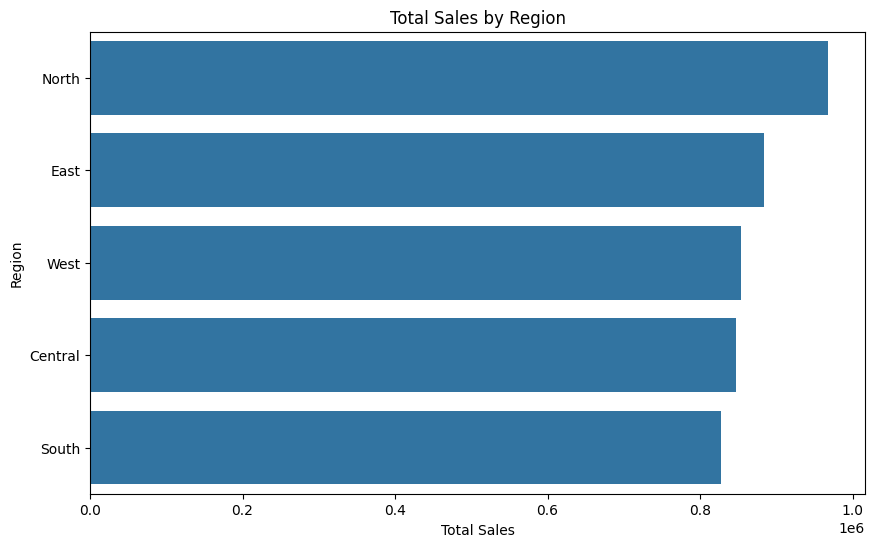

In [32]:
region_sales = df.groupby('region')['totalprice'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.values, y=region_sales.index)
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

***Monthly Sales Trend***

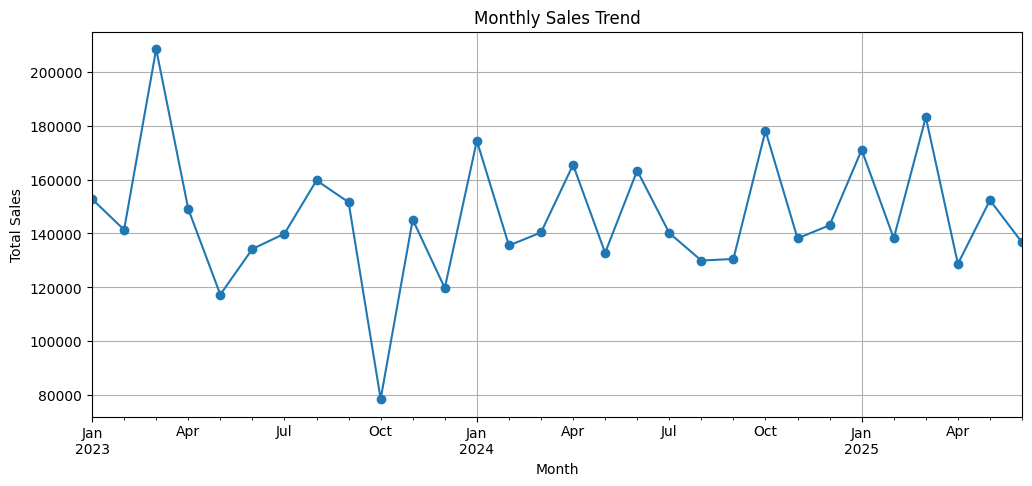

In [33]:
monthly_sales = df_clean.groupby('month')['totalprice'].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

***Top 10 Products by Revenue***

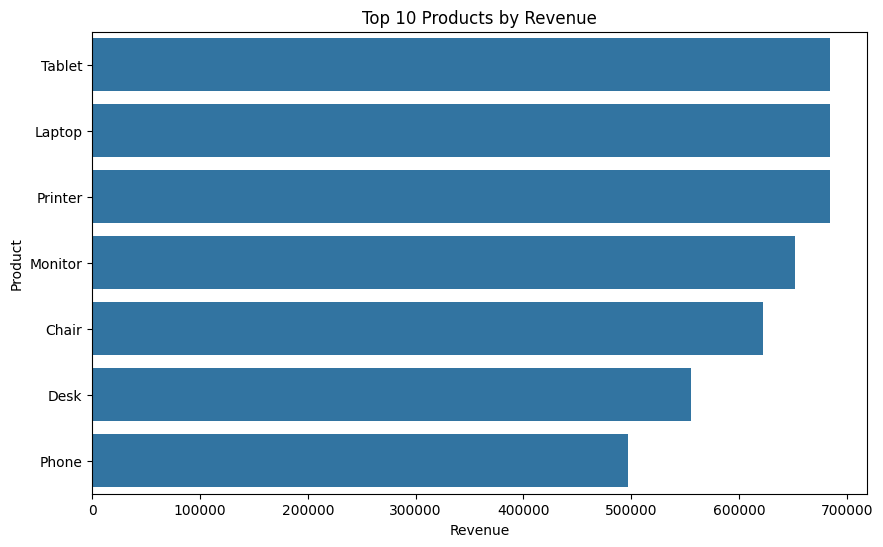

In [34]:
top_products = df_clean.groupby('product')['totalprice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.show()

***Return Rate***

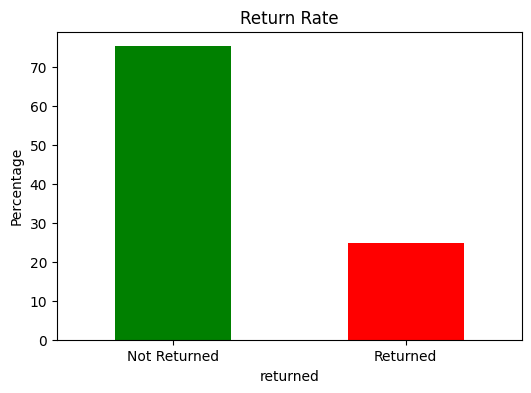

Return Rate (%):
 returned
0    75.2
1    24.8
Name: proportion, dtype: float64


In [37]:
return_counts = df_clean['returned'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
return_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Return Rate')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Not Returned', 'Returned'], rotation=0)
plt.show()

print("Return Rate (%):\n", return_counts)

***Average Delivery Time***

In [38]:
df_clean['delivery_days'] = (df_clean['deliverydate'] - df_clean['orderdate']).dt.days
avg_delivery_time = df_clean['delivery_days'].mean()
print(f"Average Delivery Time: {avg_delivery_time:.2f} days")

Average Delivery Time: 6.04 days


***Sales by Payment Method***

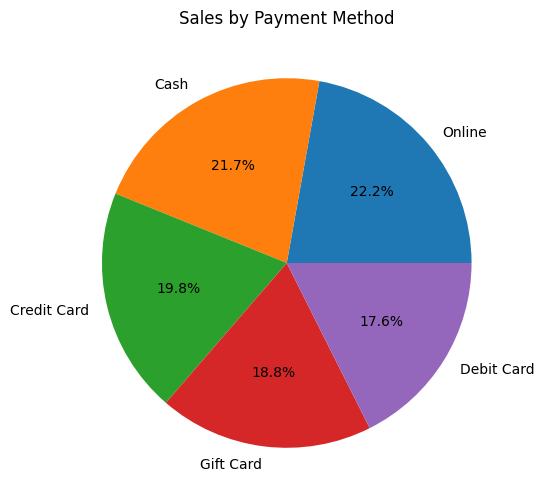

In [39]:
payment_method_sales = df_clean.groupby('paymentmethod')['totalprice'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
payment_method_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Payment Method')
plt.ylabel('')
plt.show()

###Conclusion : What We Found from the Sales Data

**1) Top Regions Perform Better**

Some regions are doing really well in sales. We can learn from these areas and try the same strategies in low-performing regions.

**2) Best-Selling Products & Returns**

A few products sell the most — these are our best performers. But some products also have many returns. This may mean:

*   Product quality issues
*   Wrong product expectations
*   Need for better product info or photos

**3) Popular Payment Methods**

Most customers use digital payments like credit cards and UPI. Cash on delivery is less common, especially in cities.

**4) Discounts Can Lead to More Returns**

Orders with big discounts are sometimes returned more. This could be due to quick decisions by buyers or thinking "cheap = low quality." We should check this pattern.

**5) Sales Are Growing Month-by-Month**

Overall, sales are going up! Some months are much better — maybe due to festivals or promotions. So, we should plan marketing in those months.

**6) Delivery Time Affects Returns**

On average, deliveries are okay — but some areas have delays. We noticed that late deliveries = more returns. This means we should improve delivery in those places.



###  Final Recommendations

- **Promote best-selling products** and phase out low-performing ones.  
- **Target marketing** to regions with potential for growth.  
- **Optimize delivery services** in areas with consistent delays.  
- **Improve product presentation** (images, descriptions) to reduce returns.  
- Plan major **discount campaigns during high-traffic months** for best impact.